# DATA 6550 Project #2
_Isaiah Osborne_

## Overview

I'm going to try and _accurately_ visualize survival rates across different genders for the Titanic.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns

In [4]:
titanic = pd.read_csv("../../Data/titanic.csv")

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


We're going to try to look at the difference between survival rates for men and women. I'm going to try and break it down across passenger category and the class of the passenger.

## Data Preparation

In [ ]:
firstClassMen = titanic[(titanic["who"] == "man") & (titanic["class"] == "First")][
    "survived"
].mean()
thirdClassMen = titanic[(titanic["who"] == "man") & (titanic["class"] == "Third")][
    "survived"
].mean()

survivalIncreaseRichMen = firstClassMen / thirdClassMen

In [ ]:
survivalRateChildren = titanic[
    (titanic["who"] == "child") & (titanic["class"] == "Second")
]["survived"].mean()

In [361]:
firstClassWomen = titanic[(titanic["who"] == "woman") & (titanic["class"] == "First")][
    "survived"
].mean()
thirdClassWomen = titanic[(titanic["who"] == "woman") & (titanic["class"] == "Third")][
    "survived"
].mean()

survivalDecreasePoorWomen = thirdClassWomen / firstClassWomen

In [362]:
survivalDecreasePoorWomen

0.5022669032130889

In [396]:
classes = ["First", "Second", "Third"]

### Setup the Figure

In [ ]:
# repeat our annotations - so it's not **so** stinking long...
def sideAnnotation(figure, firstLine, callout, finalLine, calloutColor, y, x):
    figure.text(
        x,
        y + 0.04,
        firstLine,
        ha="center",
        va="center",
        size=15,
        style="italic",
    )

    figure.text(
        x,
        y,
        callout,
        ha="center",
        va="center",
        size=35,
        fontweight="bold",
        color=calloutColor,
    )

    figure.text(
        x,
        y - 0.04,
        finalLine,
        ha="center",
        va="center",
        size=15,
        style="italic",
    )

C:\Users\IMOsb\AppData\Local\Temp\ipykernel_31916\224770208.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels([f"{x:.0%}" for x in vals], size=12)


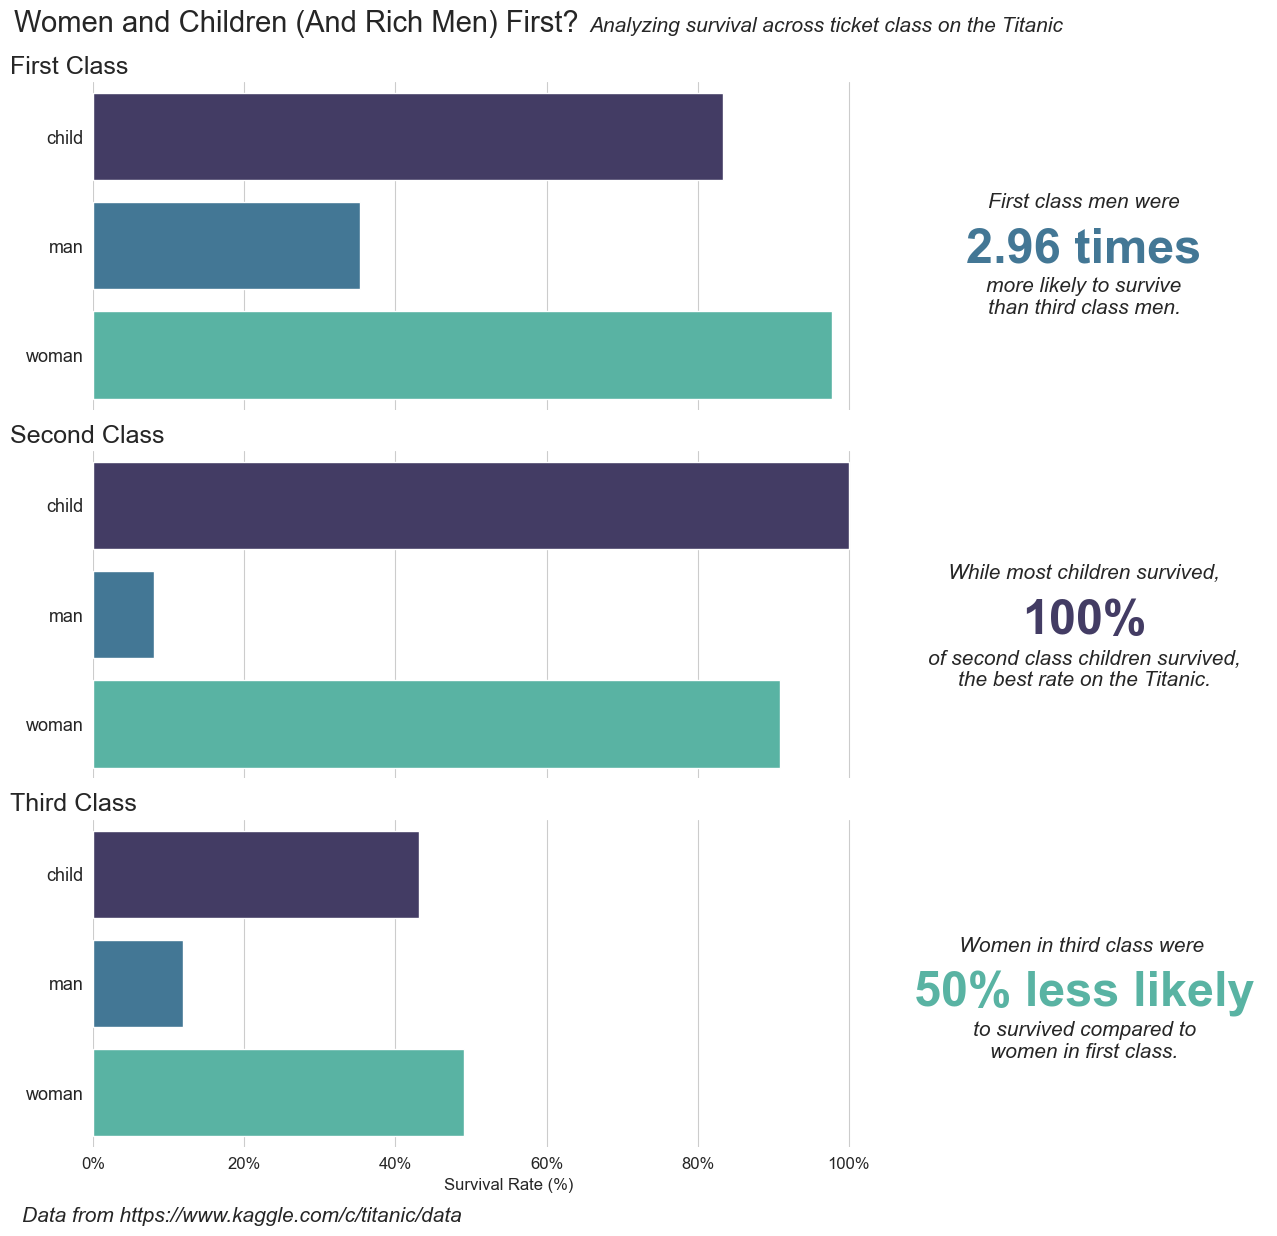

In [407]:
# create a figure
figure, axis = plt.subplots(nrows=3)
figure.set_size_inches(9, 12)

# add tight layout
figure.tight_layout()

for i in range(3):
    # filter the data (and sort so it's always consistent)
    filteredData = titanic[titanic["pclass"] == i + 1].sort_values("who")

    # add our barplot
    graph = sns.barplot(
        data=filteredData,
        x="survived",
        y="who",
        hue="who",
        ax=axis[i],
        errorbar=None,
        palette="mako",
    )

    # set out x limits (1.1 so that 1.0 actually shows up on the legend)
    graph.set_xlim((0, 1.1))

    # https://stackoverflow.com/a/52472732
    # remove the frame around the figure
    graph.set_frame_on(False)
    # get rid of our x label
    graph.set_ylabel("")

    # set the size of our axis labels
    # https://stackoverflow.com/a/55923757
    graph.tick_params(axis="y", labelsize=13)

    # get rid of our ticks and labels for most of the charts...
    if i != 2:
        graph.set_xticklabels([])
        graph.set_xlabel("")
    else:
        # format them to be percentages
        # from here: https://stackoverflow.com/a/31357733
        vals = graph.get_xticks()
        graph.set_xticklabels([f"{x:.0%}" for x in vals], size=12)
        graph.set_xlabel("Survival Rate (%)", size=12)

    # add the custom title
    graph.set_title(f"{classes[i]} Class", loc="left", x=-0.1, size=18)


# https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots
# move the subplots down to add a title
figure.subplots_adjust(top=0.92)
# add a subtitle
figure.suptitle("Women and Children (And Rich Men) First?", size=21, x=0.275)

# fancy subtitle!
figure.text(
    0.6,
    0.962,
    "Analyzing survival across ticket class on the Titanic",
    size=15,
    style="italic",
)

# add the annotation to the side
sideAnnotation(
    figure=figure,
    firstLine="First class men were",
    callout=f"{survivalIncreaseRichMen:.2f} times",
    finalLine="more likely to survive\nthan third class men.",
    calloutColor="#437795",
    y=0.78,
    x=1.15,
)

sideAnnotation(
    figure=figure,
    firstLine="While most children survived,",
    callout=f"{survivalRateChildren:.0%}",
    finalLine="of second class children survived,\nthe best rate on the Titanic.",
    calloutColor="#433c64",
    y=0.47,
    x=1.15,
)

# callout out women values
sideAnnotation(
    figure=figure,
    firstLine="Women in third class were ",
    callout=f"{survivalDecreasePoorWomen:.0%} less likely",
    finalLine="to survived compared to\nwomen in first class.",
    calloutColor="#59b3a3",
    y=0.16,
    x=1.15,
)

# I know it's icky, but it stretches out the figure for us...
figure.text(
    1.35,
    0.5,
    " ",
)

figure.text(
    -0.03,
    -0.03,
    "Data from https://www.kaggle.com/c/titanic/data",
    style="italic",
    size=15,
)

plt.show()

## Bonus - Colorblind Accessibility

I really liked the `mako` color scheme, but I wanted to make sure it was colorblind accessible. (I have family members who are colorblind, so it's really important to me). I did what any reasonable programmer would do at this point: I googled and ended up on Stack Overflow.

- <https://stackoverflow.com/questions/12168795/algorithm-to-simulate-color-blindness>
- <https://mapeper.github.io/jsColorblindSimulator/>